<h1> Week 4 </h1>


#What is an outlier

In [ ]:
%%capture 
!pip install daal4py
#we will need it later, so let it install now

<h2> Outlier Analysis </h2>

<h3> What is an outlier? </h3> 

- “an outlier is an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism” [Hawkins 1980]

- “an outlier observation is one that appears to deviate markedly from other members of the sample in which it occurs” [Barnett and Lewis 1994]. 


###Some sources of outliers:

– Measurement errors.

– Data entry errors.

– Contamination of data from different sources.

– Rare events.


Detecting outliers can be useful in many scenarios. For example, you can use it as a way of detecing intruders on a campus network, or to detect unusual activity on a credit card, or even to identify unusuall patterns in MRI scans to diagnose a disease early. It can also be used to clean your model which can give higher accuracy and better results.

##The curse of dimensionality

A lot of the outlier techniques that we know would fail to identify outliers when the number of attributes (features) increase. This is because of how difficult it is to estimate the multidimensional distribution of the data.


![picture](https://www.relataly.com/wp-content/uploads/2021/06/image-23.png)
https://www.relataly.com/multivariate-outlier-detection-using-isolation-forests-in-python-detecting-credit-card-fraud/4233/#h-4-2-lof-model 



##Outlier detections methods 



##Statistics-Based  
- The basic assumption is that the data would be distributed normally and that normal points shall appear near the high-probability points, and outliers would be in low probability areas.



###Hypothesis testing methods


#####Grubbs test (for a single univariate outlier)
    
[Source](https://www.statology.org/grubbs-test-python/)
    
```
  pip install outlier_utils

```
Then, you can use the **smirnov_grubbs.test(data, alpha=.05)**
.

assumptions: 
- data is normally distributed 
- there are more than 7 datapoints at least


In [ ]:
!pip install outlier_utils 
import pandas as pd 
import numpy as np 
from outliers import smirnov_grubbs as grubbs

#define data
data = np.array([5, 14, 15, 15, 14, 19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40])

#perform Grubbs' test
grubbs.test(data, alpha=.05)


array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

The Grubbs test function here returned an array with outliers removed. The value 40 was removed from the numpy array.


In [ ]:
#Note that 5, the smallest value in the array, will not be detected as an outlier
grubbs.min_test(data, alpha=.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29, 40])

In [ ]:
#here 40 was detected as an outlier 
print(grubbs.max_test(data, alpha=.05))
print(grubbs.max_test_outliers(data, alpha=.05)) #you can get the values removed here if you want to inspect them 


[ 5 14 15 15 14 19 17 16 20 22  8 21 28 11  9 29]
[40]


![picture](https://github.com/mohamedayman15069/ImagesForWeek4/blob/main/grubbs.png?raw=true)

Here is a complete example from a book by Ihab Ilyas and Xu Chu. The book is called Data cleaning.


####Tietjen-Moore test
- <h5> Tietjen-Moore test for multiple univariate outliers 

If you are testing for a single outlier, it becomes exactly similar to the Grubbs test. It is a generalization for it.


> It is important to note that the Tietjen-Moore test requires that the suspected number of outliers be specified exactly. If this is not known, it is recommended that the generalized extreme studentized deviate test be used instead (this test only requires an upper bound on the number of suspected outliers) [Source](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h2.htm)

```
>>> x = np.array([-1.40, -0.44, -0.30, -0.24, -0.22, -0.13, -0.05, 0.06,
0.10, 0.18, 0.20, 0.39, 0.48, 0.63, 1.01])
>>> outliers_tietjen(x, 2)
array([-0.44, -0.3 , -0.24, -0.22, -0.13, -0.05,  0.06,  0.1 ,  0.18,
0.2 ,  0.39,  0.48,  0.63])
```
It is available in scikit learn, which makes it very easy to use, but the only limitation is that you have to mention the number of outliers beforehand.






In [ ]:
!pip install scikit-posthocs

####Generalized Extreme Studentized Deviate (ESD) Test     

It requires only an upper bound estimation on the number of outliers and it is used when the exact number of outliers is unknown.




In [ ]:

#https://towardsdatascience.com/anomaly-detection-with-generalized-extreme-studentized-deviate-in-python-f350075900e2 a very nice article on this 
import scikit_posthocs as ph

data = np.array([-0.25, 0.68, 0.94, 1.15, 1.2, 1.26, 1.26, 1.34,
    1.38, 1.43, 1.49, 1.49, 1.55, 1.56, 1.58, 1.65, 1.69, 1.7, 1.76,
    1.77, 1.81, 1.91, 1.94, 1.96, 1.99, 2.06, 2.09, 2.1, 2.14, 2.15,
    2.23, 2.24, 2.26, 2.35, 2.37, 2.4, 2.47, 2.54, 2.62, 2.64, 2.9,
    2.92, 2.92, 2.93, 3.21, 3.26, 3.3, 3.59, 3.68, 4.3, 4.64, 5.34,
    5.42, 6.01])
print(ph.outliers_gesd(data, 5, report = True))


H0: no outliers in the data
Ha: up to 5 outliers in the data
Significance level:  α = 0.05
Reject H0 if Ri > Critical Value (λi)

Summary Table for Two-Tailed Test
---------------------------------------
      Exact           Test     Critical
  Number of      Statistic    Value, λi
Outliers, i      Value, Ri          5 %
---------------------------------------
          1          3.119        3.159
          2          2.943        3.151
          3          3.179        3.144 *
          4           2.81        3.136
          5          2.816        3.128


####IQR test



> Simple detection of potential outliers based on interquartile range (IQR). Data that lie within the lower and upper limits are considered non-outliers. The lower limit is the number that lies 1.5 IQRs below (coefficient may be changed with an argument, see Parameters) the first quartile; the upper limit is the number that lies 1.5 IQRs above the third quartile. [source](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.outliers_iqr/)

![picture](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([ 4,  5,  6, 10,  4,  3,  1,  2,  3,  5,  3])

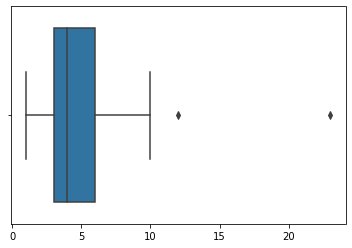

In [ ]:
#IQR analysis 
import seaborn as sns 
import pandas as pd
import numpy as np
import scikit_posthocs as sp

x = np.array([4, 5, 6, 10, 12, 4, 3, 1, 2, 3, 23, 5, 3])
sns.boxplot(x)
#note that the returned array doesn't have the 12 or the 23 
sp.outliers_iqr(x)

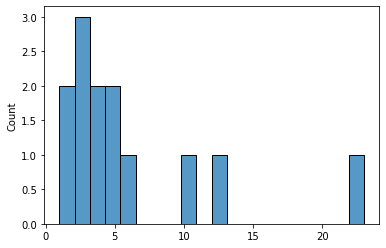

In [ ]:
sns.histplot(x, bins=20)


###Fitting a distribution </h4>
fitting a distribution or inferring a probability density function (pdf) based on the observed data. Then, data points that have low probabilties are identified as outliers.
   


####parametric

they assume that the data follows an underlying distribution. For example, if the data was normally distributed, they would need to learn the mean and variance.  

here we rely on the z_score, which is calculated for each point by subtracting the mean of the data and dividing by the standard deviation. take the absolute value of this, and if it is greater than a certain threshold, we consider it as an outlier.

This might result in a problem knowm as **Masking**.

In the example above, the mean was 136.78 and the standard deviation was 323.92. If our algorithm treated whatever is more than 2 std away from the mean as an outlier, it wouldn't have detected the person with an age 1 as an outlier.

 **[136.78 − 2 ∗ 323.92, 136.78 + 2 ∗ 323.92] = [−511.06, 784.62].**





####Masking
  
  masking is when one outlier is so sever that it changes our mean and STD so much that it masks other outliers in the process. In other words, this is why this method is not **robust**.

---



##### Robust Univariate Statistics


##review

######Median, MAD, and Hampel
  refresher: The median of a set of n data points is the data point for
which half of the data points are smaller, and half are larger; in the case of an even number of data points, the median is the average of the middle two data points. [Data cleaning Book - chapter 2 - page 20]

* <h5> Median absolute deviation (MAD)
The median absolute deviation (MAD) is defined as the median of the absolute deviations from the data’s median, namely, 
  
  **MAD = mediani(|xi − medianj(xj)|)**

  remeber that in the calculation of the std, the distances between each point and the mean was squared, which means that outliers effect is heavily magnified, which increases the masking effect and decreases the possibility of detecting all outliers.

  Here in the MAD, we don't take the square of anything. Moreover, we take the median of the distances, which decreases the extreme effect of outliers and make this test more robust.

  
  
  <h3> Hampel X84
  
  In this test, outliers are those points that are 1.4826X MADs away from the median, where X is the number of standard deviations away from the mean one would have used if there were no outliers in the dataset. [Data cleaning - chapter 2]

In [ ]:
x = np.array([1, 25, 27, 30, 32, 35, 40, 41, 1000])
x = pd.Series(x)
med = x.median()
print("Median: ", med)
mad =  np.median(np.abs(x-np.median(x)))
print("MAD: ", mad)
print("Low range: ", med - 2*1.4826*mad)
print("High range: ", med+2*1.4826*mad)
print("Compared to mean and std values of  [−511.06, 784.62]")

#now, the first and last values are correctly identified as outliers 


Median:  32.0
MAD:  7.0
Low range:  11.2436
High range:  52.7564
Compared to mean and std values of  [−511.06, 784.62]


####Multivariate statistics-based analysis
<h2> Now, let's check how to apply it on Multivariate data

some outliers can only be detected when you consider them in multidimensional space.

![picture](https://github.com/mohamedayman15069/ImagesForWeek4/blob/main/grubbs.png?raw=true)

consider t5, alone its income is not an outlier (120) is ok, and alose alone, its tax is not an outlier (7) is ok. But the general trend here suggests that as the salary increases, the tax should also increase, and only now we can gyess that t5 is a suspect.

To do this, the distance between multidimensional points can be measured by the Mahalanobis distance. it is a multidimensional generalization of measuring how many standard deviations away a point is from the mean of the population.






#####The robust way of doing it (FastMCD)

The minimum covariance determinant is the equivalent of the Median and MAD we discussed earlier.


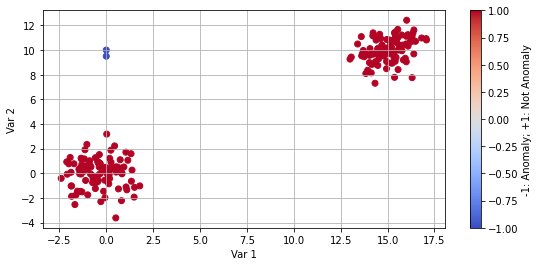

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
##https://medium.com/analytics-vidhya/anomaly-detection-in-python-part-1-basics-code-and-standard-algorithms-37d022cdbcff
### Create the Data
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]), cov = np.array([[1, 0], [0, 1]]), size = 100)
d2 = np.random.multivariate_normal(mean = np.array([15, 10]), cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

#creating outliers 
outliers = np.array([[0, 10],[0, 9.5]])

d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])
### The outliers added above are what we want to detect ####

############# Use Mahalanobis distance method to detect them ####

# Define the Elliptic Envelope
el = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(d)
# Create column that shows anomaly status
d['Anomaly or Not'] = el.predict(d)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()


https://stats.stackexchange.com/questions/475636/intuitive-explanation-of-minimum-covariance-determinant-mcd 


One way to detect anomalies is to assume that regular (non-anomalous) data are generated by a particular probability distribution, and to declare points with low probability density as anomalies. For ellipitically distributed (e.g. Gaussian) data, this can be done by computing the Mahalanobis distance from each point to the mean, and defining anomalies as points with with distance above some threshold. The Mahalanobis distance requires the parameters of the distribution (mean and covariance matrix). Since these are unknown, they must be estimated from the data.

A problem arises here because anomalies in the data can distort the parameter estimates, with the effect of making these points appear less anomalous than they really are. For example, distant outliers will pull the ordinary sample mean toward themselves, and artificially inflate the ordinary sample covariance matrix. If we knew a priori which points were anomalous, we could simply exclude them when estimating the parameters. But, this information is often unavailable.

MCD is a method for estimating the mean and covariance matrix in a way that tries to minimize the influence of anomalies. The idea is to estimate these parameters from a subset of the data that has been chosen to (hopefully) not contain anomalies.

More specifically, imagine taking all possible subsets of the data, of a specified size. Estimate the mean and covariance matrix for each subset. Then, keep the estimates for the subset whose covariance matrix has the smallest determinant. The chosen covariance matrix is finally multiplied by a 'consistency factor'.

The idea behind minimizing the determinant is that the determinant of a covariance matrix measures how broad the distribution is. MCD therefore selects the subset of the data that is most tightly distributed. This is to exclude anomalies, which are likely to lie further away from the rest of the data (e.g. see figure 1 in the paper).

In practice, one can't actually perform a brute force search over all possible subsets of the data, because there are too many. So, practical MCD algorithms are concerned with how to perform this procedure in a computationally efficient way.

In [ ]:

#https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ 


#there is another way of detecting outliers using MCD 
# evaluate model performance with outliers removed using elliptical envelope

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(335, 13) (335,)
MAE: 3.437




---




####non-parametric </h5>  
      they infer the distribution from the data itself. 

###Pros and Cons of statistical methods

**Pros of statistical methods:** 

1- They are unsupervised, there is no need for labeled data for them to learn from it.

2- They provide a confidence score for each outlier that can be later used to judge removing it or not.

3- finally, they can provide interpretation for outliers if the underlying data had a specific distribution.



---


**Cons of statistical methods:**

1- They assume that the data follows a specific distribution, which is hardly the case for multidimensional data.

2- also, even if there is a distribution, it is still hard to choose which hypothesis test statistics to apply.


## Distance-based outlier detection methods </h2>

###pros and cons of Distance-based outlier detection

These methods mainly define a model that defines a "normal" distance that points should be far from each other; thus, points that are farther away are considered outliers.

 - Local: Measures the distance between a point and its neighbors 
 - Global: measures the distance between a point and all other data points.


 Pros: 

 - They are purely unsupervised and they don't need any assumptions about the distribution of the data.

 - can be applied easily on different data types as long as you define a distance measure to use.

 Cons: 

 - a "normal" data point might have few close neighbors so it might be identified as an outlier, or an anomaly that has close neighbors 

 - very heavy computationally as you calculate the distance between each pair of points.

 - Defining the distance measure for complex data types is not an easy task and it is what makes the difference between a poor model and a good model.

 

###KNN distance based outlier detection
 

the idea is to measure how far each point is from its Kth nearest neighbor, and if it was "very far", then we can classify it as an outlier.

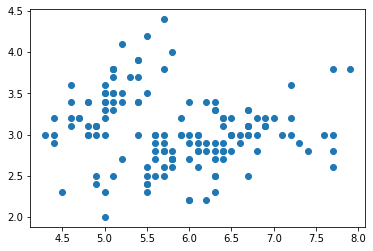

In [ ]:
#the codes are inspired by this reference https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# input data
df = data[["sepal_length", "sepal_width"]]

# scatterplot of inputs data
plt.scatter(df["sepal_length"], df["sepal_width"])

# create arrays
X = df.values

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
       131]),)
     sepal_length  sepal_width
14            5.8          4.0
15            5.7          4.4
18            5.7          3.8
22            4.6          3.6
32            5.2          4.1
33            5.5          4.2
41            4.5          2.3
59            5.2          2.7
60            5.0          2.0
108           6.7          2.5
109           7.2          3.6
117           7.7          3.8
118           7.7          2.6
131           7.9          3.8


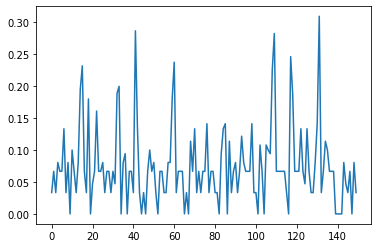

In [ ]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
print(outlier_index)

# filter outlier values
outlier_values = df.iloc[outlier_index]
print(outlier_values)

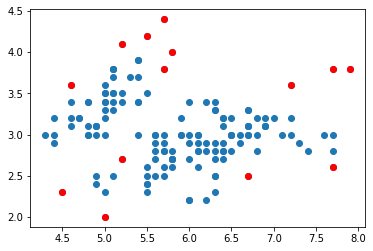

In [ ]:
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")

In [ ]:
#code; https://www.analyticsvidhya.com/blog/2021/06/univariate-anomaly-detection-a-walkthrough-in-python/                      source <-----
# python outlier detection
!pip install pyod

import warnings
import numpy as np
import pandas as pd
from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# data for anomaly detection
data_values = [['2021-05-1', 45000.0],
       ['2021-05-2', 70000.0],
       ['2021-05-3', 250000.0],
       ['2021-05-4', 70000.0],
       ['2021-05-5', 45000.0],
       ['2021-05-6', 55000.0],
       ['2021-05-7', 35000.0],
       ['2021-05-8', 60000.0],
       ['2021-05-9', 45000.0],
       ['2021-05-10', 25000.0],
       ['2021-05-11', 142936.0],
       ['2021-05-12', 138026.0],
       ['2021-05-13', 28347.0],
       ['2021-05-14', 40962.66],
       ['2021-05-15', 34543.0],
       ['2021-05-16', 40962.66],
       ['2021-05-17', 25207.0],
       ['2021-05-18', 37502.0],
       ['2021-05-19', 29589.0],
       ['2021-05-20', 78404.0],
       ['2021-05-21', 26593.0],
       ['2021-05-22', 123267.0],
       ['2021-05-23', 46880.0],
       ['2021-05-24', 65361.0],
       ['2021-05-25', 46042.0],
       ['2021-05-26', 48209.0],
       ['2021-05-27', 44461.0],
       ['2021-05-28', 90866.0],
       ['2021-05-29', 46886.0],
       ['2021-05-30', 33456.0],
       ['2021-05-31', 46251.0],
       ['2021-06-1', 29370.0],
       ['2021-06-2', 165620.0],
       ['2021-06-3', 20317.0]]
       
data = pd.DataFrame(data_values , columns=['date', 'amount'])

def fit_model(model, data, column='amount'):
    # fit the model and predict it
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

def plot_anomalies(df, x='date', y='amount'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


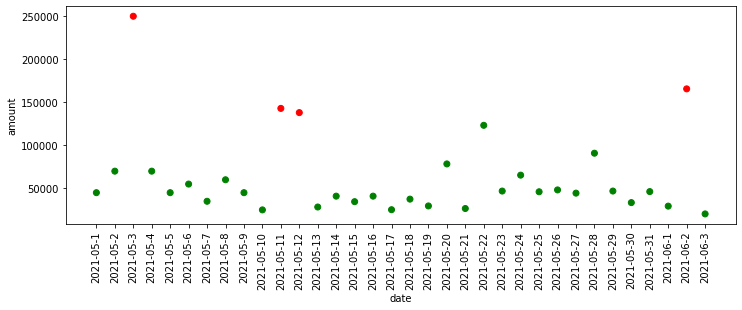

In [ ]:
"""KNN Based Outlier Detection"""
knn_model = KNN()
knn_df = fit_model(knn_model, data)
plot_anomalies(knn_df)

###Local outlier factor


It is based on the concept on the density-based measurements. It shares some ideas with DBScan (clustering algorithim), and OPTICS (ordering points). 

It is an unsupervised outlier detection mechanism that assigns an anomaly score to each point. this is score is the Local outlier factor, and the "local" here is because its measured with respect to its K nearest neighbors. 

the idea is to measure local deviation of a given point with respect to its neighbours.



In [ ]:
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
output = clf.fit_predict(X) #the third one is marked with a -1 to indicate it is an outlier.
print(output)
print(clf.negative_outlier_factor_) #lower means lower density of neighbours and more likely to be an outlier.

[ 1  1 -1  1]
[ -0.98214286  -1.03703704 -73.36970899  -0.98214286]


####Assumptions for LOF
the number of neighbors considered (parameter n_neighbors) is typically set 

- greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 

- smaller than the maximum number of close by samples that can potentially be local outliers. 

In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.



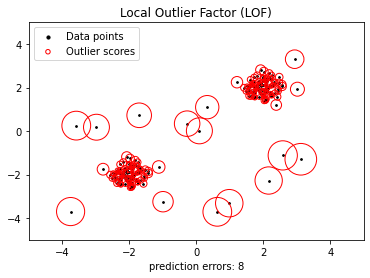

In [ ]:
#full example from scikit learn
#source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


###Multivariate outlier detection using Mahalanobis Distance 
https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3 

![picture](https://miro.medium.com/max/963/1*KzsugPQU-BTjvDACXbu9qw.jpeg)



problems with Eucledian distance: 
-  Euclidean distance will work fine as long as the dimensions are equally weighted and are independent of each other
- if the columns in your dataset are correlated to one another, the Euclidean distance between a point and distribution can give little or misleading information about how close a point really is to the cluster.

why? take a look 
![picture](https://www.machinelearningplus.com/wp-content/uploads/2019/04/Mahalanobis_Distance_Usecase.jpg) 
[image source](https://www.machinelearningplus.com/statistics/mahalanobis-distance/)

- Euclidean distance is a distance between two points only. It does not consider how the rest of the points in the dataset vary. 




---

how is Mahalanobis distance different from Euclidean distance?
- transforms the columns into uncorrelated variables
- Scale the columns to make their variance equal to 1
- Finally, calculates the Euclidean distance


![picture](https://www.machinelearningplus.com/wp-content/uploads/2019/04/3_Mahalanobis_Distance_Formula-min.png)

this is the multivariate way of subtracting the mean and dividing by the std, which is the same as multiplying by the inverse of the covariance matrix. Thus, if two columns are correlated together strongly, the convariance will be high, and by dividing by it, you are making the weight smaller.

In [ ]:
import pandas as pd
import scipy as sp
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(1000)
df_x['mahalanobis'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahalanobis
0,0.23,61.5,326,1.709860
1,0.21,59.8,326,3.540097
2,0.23,56.9,327,12.715021
3,0.29,62.4,334,1.454469
4,0.31,63.3,335,2.347239


In [ ]:
#Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom, 
#the critical value at a 0.01 significance level and 2 degrees of freedom 
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

In [ ]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahalanobis'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(10)

,carat,depth,price,mahalanobis,p_value
2,0.23,56.9,327,12.715021,0.001734
91,0.86,55.1,2757,23.909643,0.000006
97,0.96,66.3,2759,11.781773,0.002765
172,1.17,60.2,2774,9.279459,0.009660
204,0.98,67.9,2777,20.086616,0.000043
221,0.70,57.2,2782,10.405659,0.005501
227,0.84,55.1,2782,23.548379,0.000008
255,1.05,65.8,2789,11.237146,0.003630
284,1.00,58.2,2795,10.349019,0.005659
298,1.01,67.4,2797,17.716144,0.000142


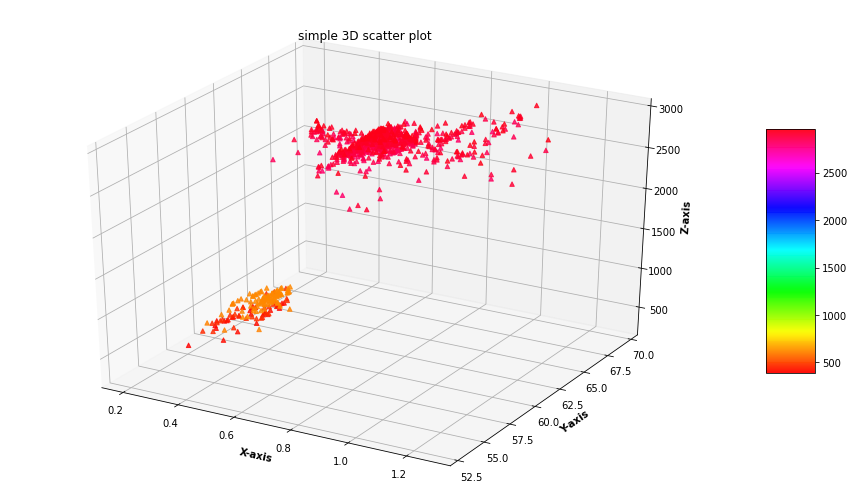

In [ ]:
from mpl_toolkits import mplot3d
#Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df_x['carat'], df_x['depth'], df_x['price'],
                    alpha = 0.8,
                    c = df_x['carat'] + df_x['depth'] + df_x['price'],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_x, x='carat', y='depth', z='price',
              color='mahalanobis')
fig.show()

##Model-based outlier detection methods </h2>


###Pros and cons of Model-based outlier detection methods
You first train a classifier model on a labelled dataset, and then if none of the trained models classified a point as normal, it is considered an outlier.

Pros:

- Testing is very easy, you only evaluate each point against the precomputed model.

- can utilize very powerful models to classify and group data points.

Cons:

- You need labeled data to teach the model.




### Isolation forests

it is based on decision trees and they assume that outliers are few and disticnt points in your dataset. they are based on the gini index or the "entropy" of the data where the distinct elements are separated near the root, and the more similar points are separated near the leaves. 

Therefore, the more depth a sample has to go through in order to be separated, the less likely it is an outlier. If it was really an "outlier", the tree should find this early in its traversal journey.

![picture](https://miro.medium.com/max/1400/1*o-UzjQcimwbqIwN6Of4ByA.png) 
source: https://towardsdatascience.com/anomaly-detection-in-python-part-2-multivariate-unsupervised-methods-and-code-b311a63f298b 



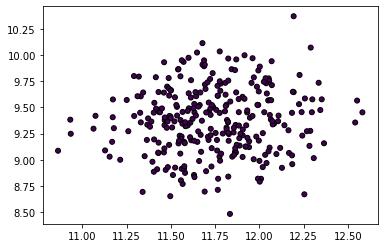

In [ ]:
#the code is inspired by this article:
#https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/


from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

#let's generate a random dataset using make blobs function
random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))

#let's see what the data looks like 
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="k")


<h2> Please note that the trees can untill there is exactly one data point in each leaf node. Or until the termination condition is met for the minimum number of data points in a leaf node. </h2>

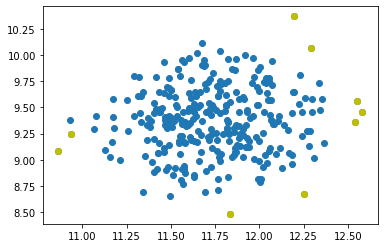

In [ ]:
#let's define our Isolation Forest model
#the number of estimators can be thought of as the tree branches and the contamination is an approximate percentage of outliers in our data 
IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X) 

#the scikit learn api would mark outliers with a -1 for us
#let's extract them and plot them 
outlier_index = where(predictions==-1)
values = X[outlier_index]
 
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

### Kernel Density Estimation



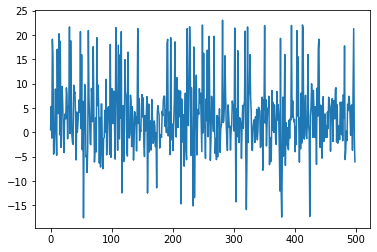

-5.676136054971186


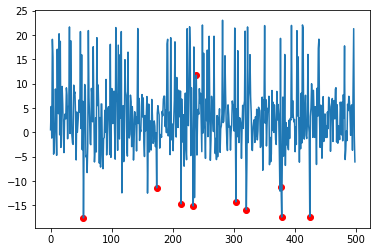

In [ ]:
#code from here: https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/

from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
 
random.seed(135)
def prepData(N):
    X = []
    for i in range(n):
        A = i/1000 + random.uniform(-4, 3)
        R = random.uniform(-5, 10)
        if(R >= 8.6):
            R = R + 10
        elif(R < (-4.6)):
            R = R +(-9)        
        X.append([A + R])   
    return array(X)
 
n = 500
X = prepData(n)
 
x_ax = range(n)
plt.plot(x_ax, X)
plt.show() 
 
kern_dens = KernelDensity()
kern_dens.fit(X)
 
scores = kern_dens.score_samples(X)
threshold = quantile(scores, .02)
print(threshold)
 
idx = where(scores <= threshold)
values = X[idx]
plt.plot(x_ax, X)
plt.scatter(idx,values, color='r')
plt.show()

# Multivariate BACON Outlier Detection

![picture](https://github.com/mohamedayman15069/ImagesForWeek4/blob/main/bacon.png?raw=true)

In [ ]:
!pip install daal4py

In [ ]:
import daal4py as d4p
import numpy as np
import pandas as pd
def read_csv(f, c, t=np.float64):
  return pd.read_csv(f, usecols=c, delimiter=',', header=None, dtype=t)

url = 'https://raw.githubusercontent.com/mohamedayman15069/ImagesForWeek4/main/outlierdetection.csv'
ffile = pd.read_csv(url)
ffile.head()

,-1.002904,0.465707,-0.693161
0,-1.476202,-1.526035,0.805910
1,-0.895582,-1.863735,0.598637
2,26.091887,27.463716,30.581283
3,-0.827598,0.002203,-0.523410
4,0.183717,1.125140,0.065761


In [ ]:
algorithm = d4p.multivariate_outlier_detection()
# Compute outliers and get the computed results
res = algorithm.compute(ffile, None, None, None)

# result provides weights
assert res.weights.shape == (ffile.shape[0], 1)
print("\nInput data\n", ffile)
print("\nOutlier detection result (Default method) weights:\n", res.weights)
print('All looks good!')


Input data
     -1.002904   0.465707  -0.693161
0   -1.476202  -1.526035   0.805910
1   -0.895582  -1.863735   0.598637
2   26.091887  27.463716  30.581283
3   -0.827598   0.002203  -0.523410
4    0.183717   1.125140   0.065761
5    1.236908   1.335812   1.096949
6    0.448100  -0.447745  -0.349081
7    0.686967   0.933447   0.010611
8   -0.243319   0.248681  -0.291034
9   -1.891173   0.482024  -0.736512
10  29.465294  29.969819  31.528399
11   0.448939  -0.919883   0.265614
12   0.503690   0.101948  -0.331993
13   0.587081  -2.377178   0.177202
14  -0.347995   1.005393   0.808972
15   0.146659  -0.729700   0.297113
16  -1.872642  -0.362113  -0.382317
17   0.002270  -1.150125  -1.482382
18  -0.783465  -0.681570   0.721129

Outlier detection result (Default method) weights:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
All looks good!


In [ ]:
algorithm = d4p.bacon_outlier_detection()
# Compute outliers and get the computed results
res = algorithm.compute(ffile)

# result provides weights
assert res.weights.shape == (ffile.shape[0], 1)
print("\nInput data\n", ffile)
print("\nOutlier detection result (Bacon method) weights:\n", res.weights)
print('All looks good!')


Input data
     -1.002904   0.465707  -0.693161
0   -1.476202  -1.526035   0.805910
1   -0.895582  -1.863735   0.598637
2   26.091887  27.463716  30.581283
3   -0.827598   0.002203  -0.523410
4    0.183717   1.125140   0.065761
5    1.236908   1.335812   1.096949
6    0.448100  -0.447745  -0.349081
7    0.686967   0.933447   0.010611
8   -0.243319   0.248681  -0.291034
9   -1.891173   0.482024  -0.736512
10  29.465294  29.969819  31.528399
11   0.448939  -0.919883   0.265614
12   0.503690   0.101948  -0.331993
13   0.587081  -2.377178   0.177202
14  -0.347995   1.005393   0.808972
15   0.146659  -0.729700   0.297113
16  -1.872642  -0.362113  -0.382317
17   0.002270  -1.150125  -1.482382
18  -0.783465  -0.681570   0.721129

Outlier detection result (Bacon method) weights:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
All looks good!


#Outlier, Leverage, and Influential Points

![picture](https://github.com/mohamedayman15069/ImagesForWeek4/blob/main/inf%20lev.png?raw=true)
[source](https://www.youtube.com/watch?v=xc_X9GFVuVU)

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

[source](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/)

so, consider these points as if they were on a fulcrum, the farther away from the mean, the power leverage they have. Few points can skew the regression line a lot in the case of the ordinary least square regression (OLSR).

to check this, we can calculate how much our line would change with and without each point. using Cook's D function, you wouldn't have to fit a new line each time you add or remove a point, which is computationally cheaper.



The rsquared values is 0.5759696028216694


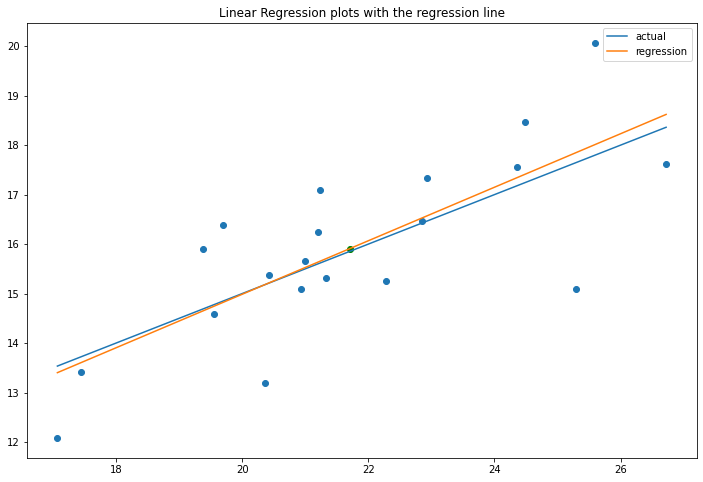

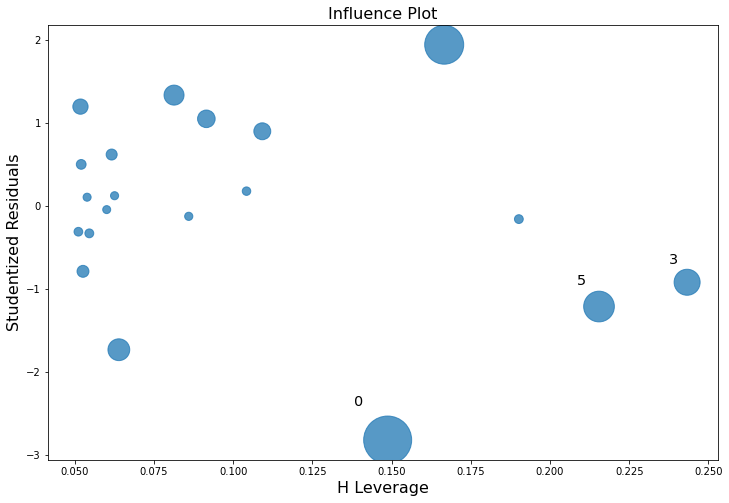

In [ ]:
#source: https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(0)
x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)

lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared values is " + str(lm.rsquared))

plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

The rsquared values is 0.028865535723010205


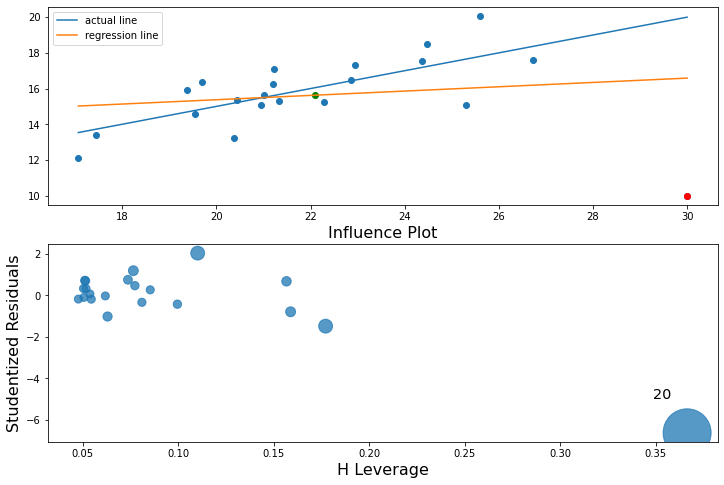

In [ ]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared values is " + str(lm4.rsquared))


fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.scatter(np.sort(x4), y4[np.argsort(x4)])
ax.scatter(30, 10, color = "red")
ax.scatter(np.mean(x4), np.mean(y4), color = "green")
ax.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
ax.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
ax.legend()

sm.graphics.influence_plot(lm4, ax = ax2, criterion="cooks")
plt.show()

The rsquared values is 0.2737752662801516


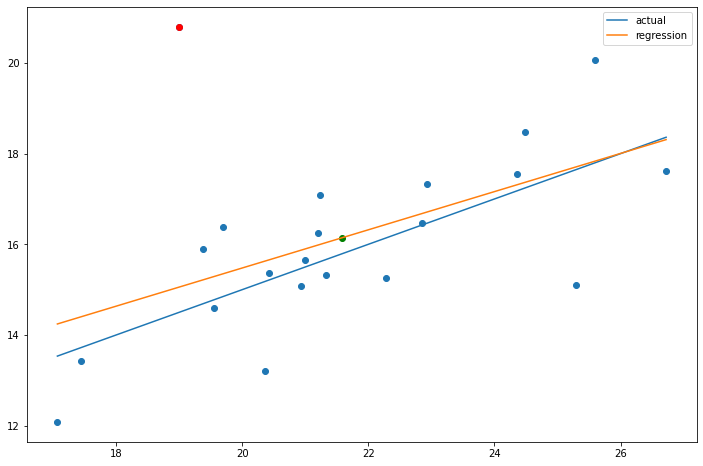

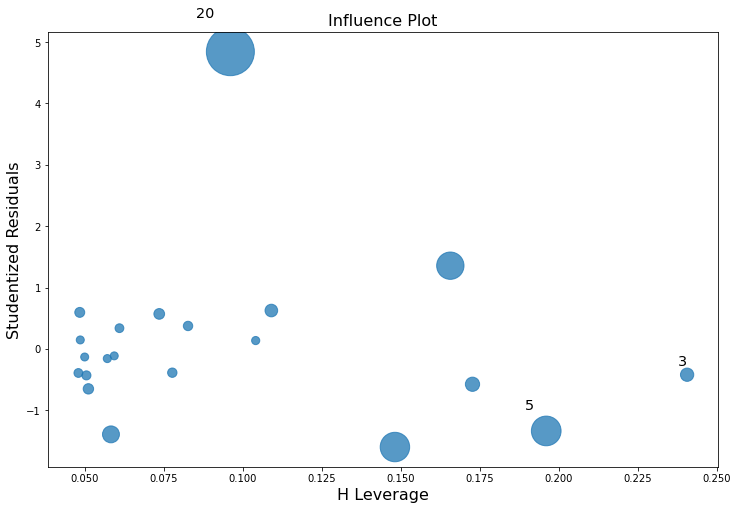

In [ ]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared values is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

In [ ]:
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()



,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [ ]:
model = ols("prestige~income+education", data=prestige).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           8.65e-17
Time:                        14:07:18   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

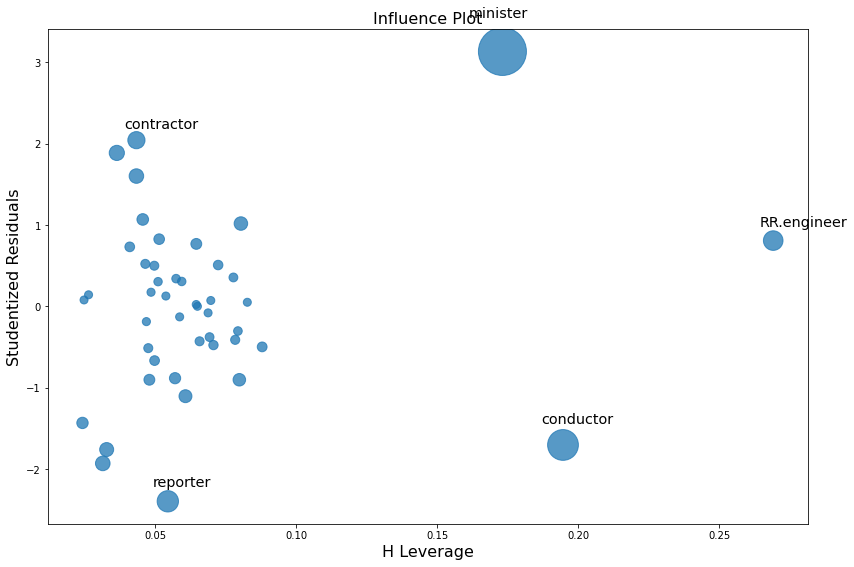

In [ ]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1);

In [ ]:
subset = ~prestige.index.isin(["conductor","RR.engineer","minister"])
model2 = ols("prestige~income+education", data=prestige,subset=subset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.02e-18
Time:                        14:08:28   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.094     -13.760       1.125
income         0.9307      0.154      6.053      0.000       0.620       1.242
education      0.2846      0.121      2.345      0.024       0.039       0.530
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.802
Skew:                          -0.614   Prob(JB):                        0.246
Kurtosis:                       3.303   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#amazing article: https://towardsdatascience.com/linear-regression-models-and-influential-points-4ee844adac6d

# Masking vs Swamping
##Masking
Masking is what happens when an outlier "masks" a second outlier, if the second by itself was to be considerd an outlier, but under the presence of the first it just seems normal. 

It happens when you use non-robust statistics as the outliers shift the mean and the std so much that some outliers just seem normal.

##Swamping
Swamping is what happens when an outlier "swamps" a second outlier, if the second can be only considerd an outlier only under the existence of the first one. Thus, after deleting the first, the second can no longer be seen as an outlier.

An example is when you have a group of outliers (e.g ages > 2000) and the rest are between 0 and 100. the outlier would skew the mean and std making people with ages 0 seem like outlier when they are pretty normal for new babies. 

![picture](https://www.researchgate.net/profile/Anna-Bartkowiak-3/publication/2690898/figure/fig2/AS:669408187908103@1536610757539/Figures-exhibiting-the-impact-of-a-group-of-outliers-on-the-covariance-matrix-Filled.pbm)

# Potential residual plot
Plot to aid in classifying unusual observations as high-leverage points, outliers, or a combination of both.



In [ ]:
!apt-get install libssl-dev > /dev/null
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x ./Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /conda  > /dev/null 2>&1 
!/conda/bin/conda install -c r r-rstan r-irkernel gxx_linux-64 -y -q > /dev/null 2>&1
!/conda/bin/R -e "IRkernel::installspec(name = 'python2', displayname = 'R', user = FALSE)"  > /dev/null 2>&1
!mkdir /root/.R/
!echo "CXX14FLAGS=-O3 -mtune=native -march=native -Wno-ignored-attributes -Wno-deprecated-declarations" > /root/.R/Makevars
import os
os._exit(00)


In [ ]:
Sys.setenv(PATH= paste("/conda/bin" , Sys.getenv("PATH"), sep = ":" ) )
install.packages('ggmap', repos='http://cran.rstudio.com/')

install.packages('codetools', repos='http://cran.rstudio.com/')

In [ ]:
# #define data
# df = data.frame(x=c(1, 3, 3, 4, 5, 5, 6, 8, 9, 12),
#                 y=c(12, 14, 14, 13, 17, 19, 22, 26, 24, 22))

# #fit linear regression model using 'x' as predictor and 'y' as response variable
# model <- lm(y ~ x, data=df)
# ols_plot_resid_pot(model)
